In [13]:
import os 
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import datetime

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
# Menentukan folder untuk menyimpan log TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Membuat callback TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [15]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('brain-cancer-MRI/Training',
                                                    batch_size=30,
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('brain-cancer-MRI/Testing',
                                                                batch_size=30,
                                                                target_size=(150, 150))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [16]:
labels_2 = ['notumor', 'pituitary', 'glioma', 'meningioma']

In [17]:
labels = validation_generator.labels
labels_series = pd.Series(labels)

value_counts = labels_series.value_counts()

print(value_counts)

2    405
1    306
0    300
3    300
Name: count, dtype: int64


In [18]:
labels = train_generator.labels
labels_series = pd.Series(labels)

value_counts = labels_series.value_counts()

print(value_counts)

2    1595
3    1457
1    1339
0    1321
Name: count, dtype: int64


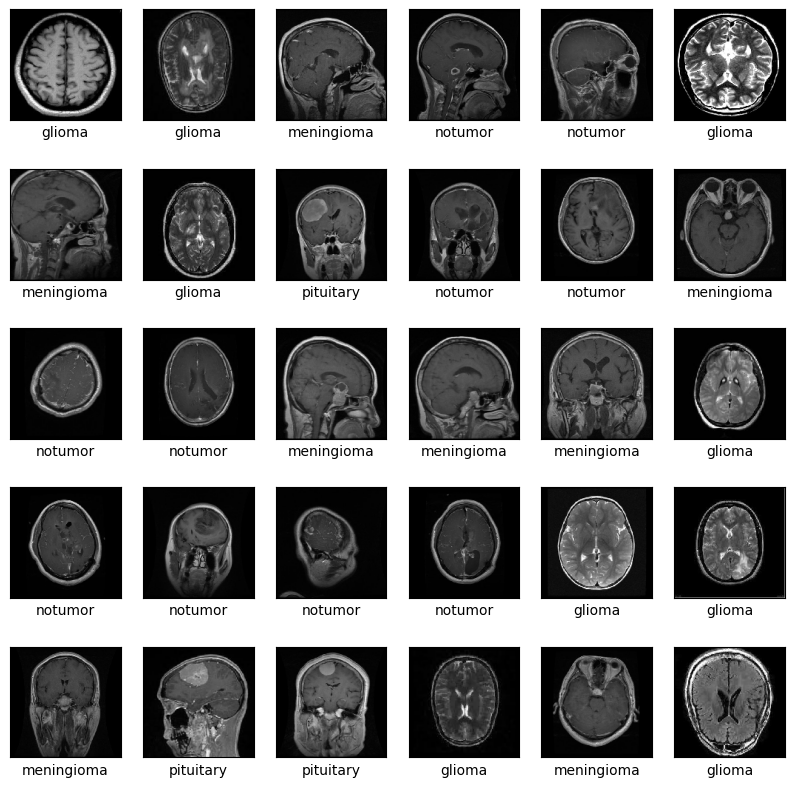

In [19]:
i = 0

batch_size = validation_generator.batch_size
if i < len(validation_generator):
    batch_images, batch_labels = validation_generator[i]
    plt.figure(figsize=(10, 10))
    for idx in range(batch_size):
        plt.subplot(5, 6, idx + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        plt.imshow(batch_images[idx])
        class_index = np.argmax(batch_labels[idx])
        class_name = labels_2[class_index]
        plt.xlabel(class_name)

        if idx >= batch_size - 1:
            break
else:
    print("invalid batch index !")

In [20]:
model = Sequential()

model.add(Conv2D(filters=50,
                kernel_size=5,
                strides=1,
                activation='relu',
                input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=100, 
                kernel_size=5,
                strides=1,
                activation='relu'))

model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 50)      3800      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 73, 73, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 100)       125100    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 34, 34, 100)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 115600)            0         
                                                                 
 dropout_1 (Dropout)         (None, 115600)           

In [22]:
history = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=validation_generator, 
    callbacks=[tensorboard_callback]
)

Epoch 1/10
191/191 [==============================] - ETA: 0s - loss: 0.7388 - accuracy: 0.7236

2023-11-26 07:06:59.437910: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4161600000 exceeds 10% of free system memory.


191/191 [==============================] - 411s 2s/step - loss: 0.7388 - accuracy: 0.7236 - val_loss: 0.4274 - val_accuracy: 0.8406
Epoch 2/10
191/191 [==============================] - ETA: 0s - loss: 0.2953 - accuracy: 0.8929

2023-11-26 07:13:12.418880: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4161600000 exceeds 10% of free system memory.


191/191 [==============================] - 370s 2s/step - loss: 0.2953 - accuracy: 0.8929 - val_loss: 0.3111 - val_accuracy: 0.8879
Epoch 3/10
191/191 [==============================] - ETA: 0s - loss: 0.2258 - accuracy: 0.9188

2023-11-26 07:19:38.072906: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4161600000 exceeds 10% of free system memory.


191/191 [==============================] - 385s 2s/step - loss: 0.2258 - accuracy: 0.9188 - val_loss: 0.2415 - val_accuracy: 0.9031
Epoch 4/10
191/191 [==============================] - ETA: 0s - loss: 0.1556 - accuracy: 0.9426

2023-11-26 07:25:51.089719: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4161600000 exceeds 10% of free system memory.


191/191 [==============================] - 370s 2s/step - loss: 0.1556 - accuracy: 0.9426 - val_loss: 0.2608 - val_accuracy: 0.9092
Epoch 5/10
191/191 [==============================] - ETA: 0s - loss: 0.1295 - accuracy: 0.9547

2023-11-26 07:31:42.692692: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4161600000 exceeds 10% of free system memory.


191/191 [==============================] - 337s 2s/step - loss: 0.1295 - accuracy: 0.9547 - val_loss: 0.2222 - val_accuracy: 0.9245
Epoch 6/10
191/191 [==============================] - 338s 2s/step - loss: 0.0989 - accuracy: 0.9655 - val_loss: 0.1878 - val_accuracy: 0.9298
Epoch 7/10
191/191 [==============================] - 334s 2s/step - loss: 0.0563 - accuracy: 0.9790 - val_loss: 0.1731 - val_accuracy: 0.9512
Epoch 8/10
191/191 [==============================] - 332s 2s/step - loss: 0.0619 - accuracy: 0.9774 - val_loss: 0.1583 - val_accuracy: 0.9519
Epoch 9/10
191/191 [==============================] - 347s 2s/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.2012 - val_accuracy: 0.9405
Epoch 10/10
191/191 [==============================] - 332s 2s/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.2012 - val_accuracy: 0.9481


/tmp/ipykernel_52484/4075161062.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('training loss', 'testing loss')


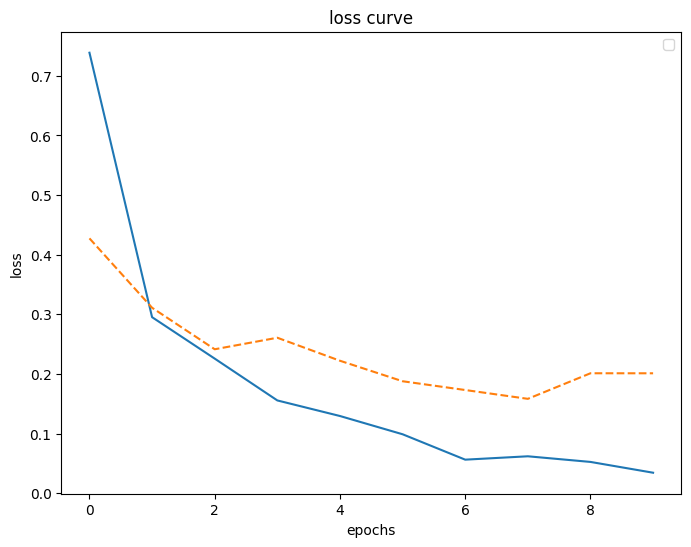

In [23]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], ls='--')
plt.legend('training loss', 'testing loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss curve')
plt.show()

/tmp/ipykernel_52484/1799021110.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('training accuracy', 'testing accuracy')


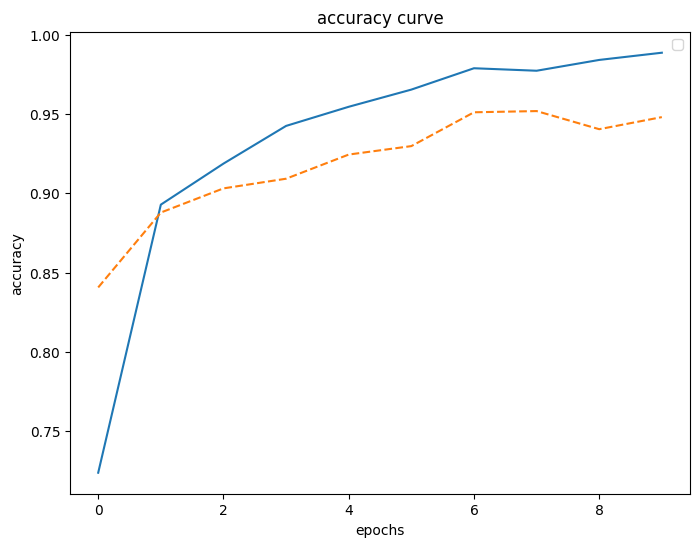

In [24]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], ls='--')
plt.legend('training accuracy', 'testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy curve')
plt.show()

In [25]:
model.evaluate(validation_generator)

44/44 [==============================] - 21s 464ms/step - loss: 0.2012 - accuracy: 0.9481


[0.20115730166435242, 0.9481312036514282]

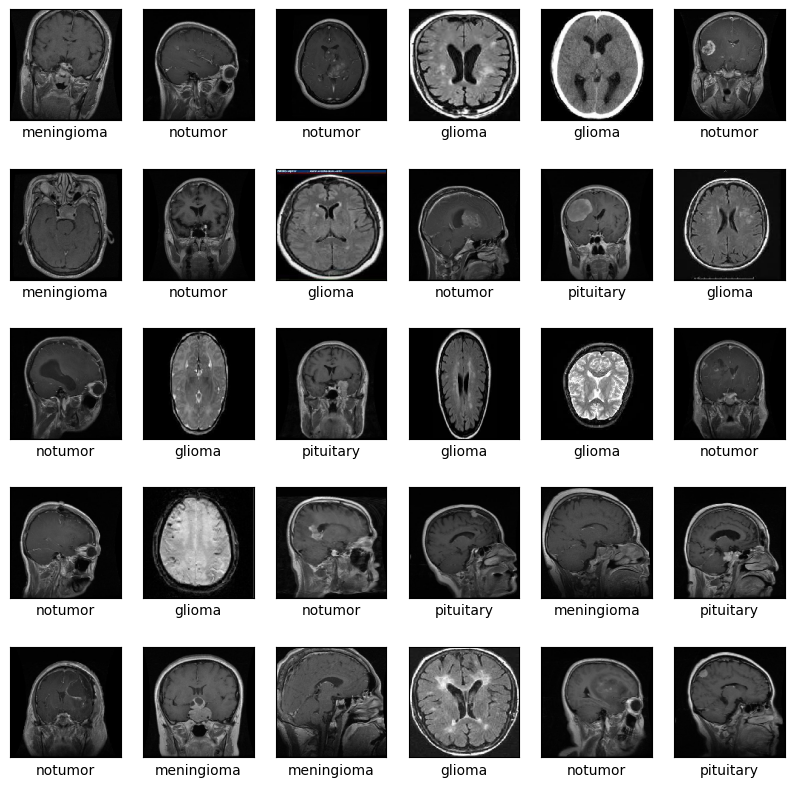

In [26]:
i = 0

batch_size = validation_generator.batch_size

if i < len(validation_generator):
    batch_images, batch_labels = validation_generator[i]
    plt.figure(figsize=(10,10))
    for idx in range(batch_size):
        plt.subplot(5, 6, idx + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch_images[idx])
        class_index = np.argmax(batch_labels[idx])
        class_name = labels_2[class_index]
        plt.xlabel(class_name)

        if idx >= batch_size - 1:
            break
else:
    print("invalid batch index !")

In [28]:
model.save('brain-cancer-MRI.h5')
print("Saved model to disk")

Saved model to disk


In [2]:
%load_ext tensorboard
%tensorboard --logdir=./logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 66555), started 0:00:03 ago. (Use '!kill 66555' to kill it.)

<img src="ss tensorboard.png">
<img src="ss tensorboard 2.png">
<img src="ss tensorboard 3.png">